In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

In [3]:
dataset = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Visualization** - plotting all the airbnb locations on the provided image of New York City

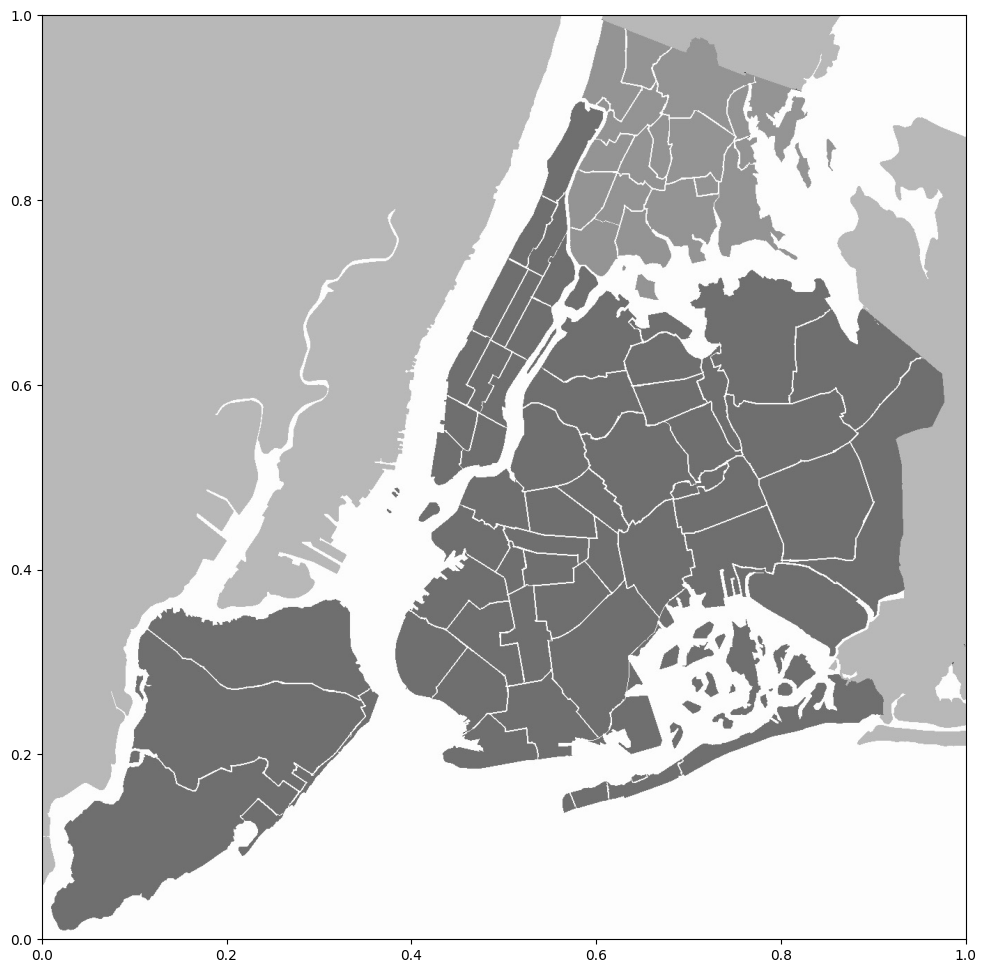

In [5]:
img = Image.open('/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png')
plt.figure(figsize = (12,12))
plt.axis('on')
plt.imshow(img, extent = (0 ,1, 0,1))
plt.show()

we can use the latitude and longitude to plot points on the map.

In [6]:
coords = dataset.loc[:, ['longitude', 'latitude']].copy()
coords

,longitude,latitude
0,-73.97237,40.64749
1,-73.98377,40.75362
2,-73.94190,40.80902
3,-73.95976,40.68514
4,-73.94399,40.79851
...,...,...
48890,-73.94995,40.67853
48891,-73.93317,40.70184
48892,-73.94867,40.81475
48893,-73.99112,40.75751


In [7]:
min_max_scaler = MinMaxScaler()
coords = pd.DataFrame(min_max_scaler.fit_transform(coords), columns = coords.columns)
coords

,longitude,latitude
0,0.511921,0.357393
1,0.490469,0.614199
2,0.569257,0.748252
3,0.535649,0.448496
4,0.565324,0.722820
...,...,...
48890,0.554109,0.432502
48891,0.585684,0.488906
48892,0.556517,0.762117
48893,0.476639,0.623612


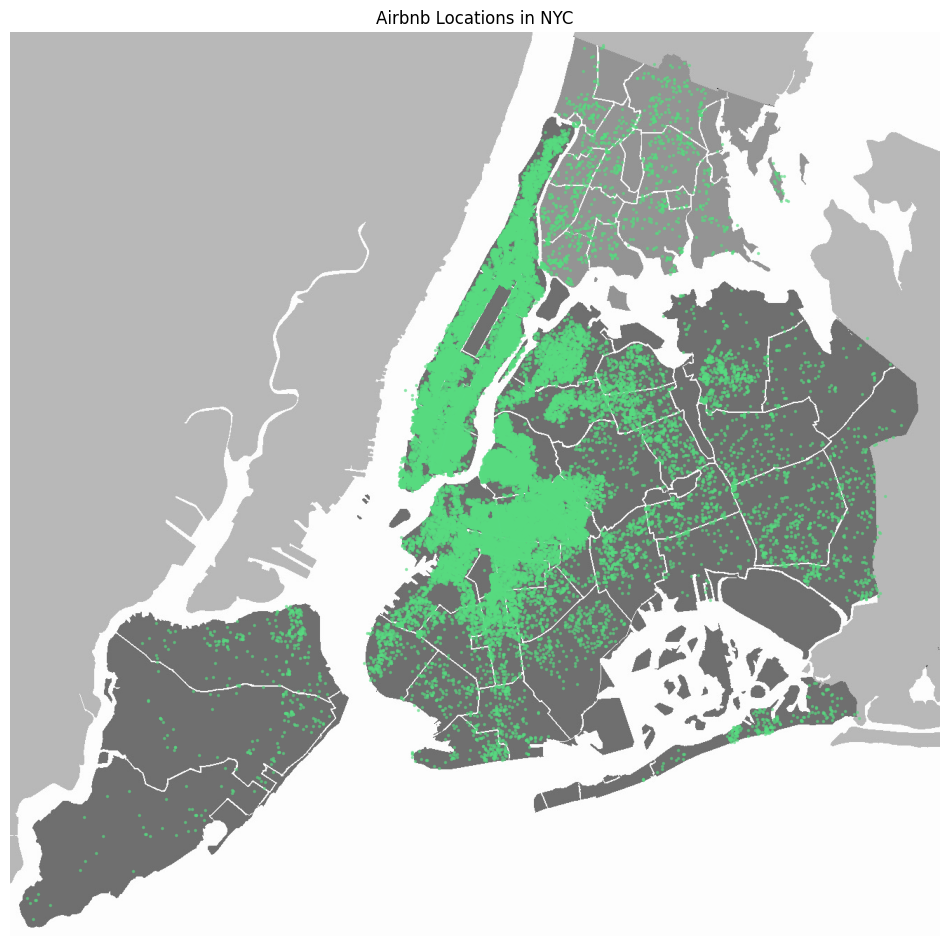

In [8]:
plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(img, extent = (-0.02,1.045,-0.02,1.015))
plt.scatter(x=coords['longitude'], y=coords['latitude'], s=2, c='#57db80', alpha = 0.5)
plt.title('Airbnb Locations in NYC')
plt.show()

# **Cleaning - removing unneeded columns**

In [9]:
unneeded_columns = ['id', 'name', 'host_id', 'host_name']
dataset = dataset.drop(unneeded_columns, axis = 1)
dataset

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [10]:
dataset.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
print("Total missing values", dataset.isna().sum().sum())

Total missing values 20104


In [12]:
dataset.isna().mean()

neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

**Because the missing values in the last_review column are difficult to deal with, we will drop that column and fill the NaN values in reviews_per_month with 0's (since the missing value implies there are no reviews for the location).**

In [13]:
dataset = dataset.drop('last_review', axis=1)
dataset['reviews_per_month'] = dataset['reviews_per_month'].fillna(0)

In [14]:
dataset

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [15]:
print("Total missing values", dataset.isna().sum().sum())

Total missing values 0


In [16]:
dataset['availability_365'] = dataset['availability_365'].apply(lambda x: 1 if x == 365 else 0)
dataset['availability_365'].value_counts()

availability_365
0    47600
1     1295
Name: count, dtype: int64

In [17]:
dataset['availability_365'].value_counts()/len(dataset['availability_365'])

availability_365
0    0.973515
1    0.026485
Name: count, dtype: float64

97.3% of data is not available 365 days and 2.7 percent is available

# # **Encoding Features**

In [18]:
dataset

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,1
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,0
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,0


In [19]:
{feature: list(dataset[feature].unique()) for feature in dataset.columns if dataset.dtypes[feature] == 'object'}

{'neighbourhood_group': ['Brooklyn',
  'Manhattan',
  'Queens',
  'Staten Island',
  'Bronx'],
 'neighbourhood': ['Kensington',
  'Midtown',
  'Harlem',
  'Clinton Hill',
  'East Harlem',
  'Murray Hill',
  'Bedford-Stuyvesant',
  "Hell's Kitchen",
  'Upper West Side',
  'Chinatown',
  'South Slope',
  'West Village',
  'Williamsburg',
  'Fort Greene',
  'Chelsea',
  'Crown Heights',
  'Park Slope',
  'Windsor Terrace',
  'Inwood',
  'East Village',
  'Greenpoint',
  'Bushwick',
  'Flatbush',
  'Lower East Side',
  'Prospect-Lefferts Gardens',
  'Long Island City',
  'Kips Bay',
  'SoHo',
  'Upper East Side',
  'Prospect Heights',
  'Washington Heights',
  'Woodside',
  'Brooklyn Heights',
  'Carroll Gardens',
  'Gowanus',
  'Flatlands',
  'Cobble Hill',
  'Flushing',
  'Boerum Hill',
  'Sunnyside',
  'DUMBO',
  'St. George',
  'Highbridge',
  'Financial District',
  'Ridgewood',
  'Morningside Heights',
  'Jamaica',
  'Middle Village',
  'NoHo',
  'Ditmars Steinway',
  'Flatiron Distr

In [20]:
def one_hot_encode(data, columns_to_encode, prefixes):
    encoded_data = data.copy()
    for column, prefix in zip(columns_to_encode, prefixes):
        one_hot = pd.get_dummies(encoded_data[column], prefix=prefix)
        encoded_data = pd.concat([encoded_data, one_hot], axis=1)
        encoded_data.drop(column, axis=1, inplace = True) 
    return encoded_data


In [21]:
dataset = one_hot_encode(
    dataset, columns_to_encode = ['neighbourhood_group', 'neighbourhood', 'room_type'],
    prefixes = ['G', 'N', 'R']
)

In [22]:
dataset

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,G_Bronx,G_Brooklyn,...,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Entire home/apt,R_Private room,R_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,1,False,True,...,False,False,False,False,False,False,False,False,True,False
1,40.75362,-73.98377,225,1,45,0.38,2,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,40.80902,-73.94190,150,3,0,0.00,1,1,False,False,...,False,False,False,False,False,False,False,False,True,False
3,40.68514,-73.95976,89,1,270,4.64,1,0,False,True,...,False,False,False,False,False,False,False,True,False,False
4,40.79851,-73.94399,80,10,9,0.10,1,0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,0.00,2,0,False,True,...,False,False,False,False,False,False,False,False,True,False
48891,40.70184,-73.93317,40,4,0,0.00,2,0,False,True,...,False,False,False,False,False,False,False,False,True,False
48892,40.81475,-73.94867,115,10,0,0.00,1,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48893,40.75751,-73.99112,55,1,0,0.00,6,0,False,False,...,False,False,False,False,False,False,False,False,False,True


# # # **Splitting/Scaling**

In [23]:
y = dataset['availability_365'].copy()
X = dataset.drop('availability_365', axis = 1).copy()

In [24]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [25]:
X

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,G_Bronx,G_Brooklyn,G_Manhattan,...,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Entire home/apt,R_Private room,R_Shared room
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,-0.551511,-0.034716,-0.151071,1.196705,-0.891833,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,-0.445079,-0.156104,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,-0.682986,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,2.221978,-0.186451,-0.151071,1.196705,-0.891833,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,-0.620379,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,-0.924616,0.048089,-0.344452,-0.245240,-0.522433,-0.682986,-0.156104,-0.151071,1.196705,-0.891833,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
48891,-0.497141,0.411637,-0.469373,-0.147729,-0.522433,-0.682986,-0.156104,-0.151071,1.196705,-0.891833,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
48892,1.573480,0.075821,-0.157070,0.144807,-0.522433,-0.682986,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
48893,0.523774,-0.843881,-0.406912,-0.293996,-0.522433,-0.682986,-0.034716,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,-0.916680,6.414894


In [26]:
from sklearn.model_selection import train_test_split

# Define test size (e.g., 20% for testing)
test_size = 0.2

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Now, X_train and y_train are used for training, while X_test and y_test are used for testing.

In [27]:
X_train

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,G_Bronx,G_Brooklyn,G_Manhattan,...,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Entire home/apt,R_Private room,R_Shared room
32645,-0.241683,-0.067821,0.592456,-0.196484,-0.275520,-0.138305,-0.186451,-0.151071,1.196705,-0.891833,...,3.387213,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
23615,2.204698,0.253262,-0.344452,-0.245240,-0.477540,-0.582814,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
31183,-0.715555,-0.158167,-0.394420,-0.245240,-0.522433,-0.682986,-0.156104,-0.151071,1.196705,-0.891833,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
29260,-0.819352,0.454751,-0.323632,-0.196484,1.430423,2.391016,-0.186451,-0.151071,1.196705,-0.891833,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
7275,0.331951,1.224744,-0.477701,-0.098973,-0.230627,-0.526468,-0.186451,-0.151071,-0.835628,-0.891833,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,14.389713,-1.040134,1.090893,-0.155887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2.155734,0.194548,-0.386092,-0.293996,-0.522433,-0.682986,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,-0.916680,6.414894
44732,0.194777,-1.054036,-0.281991,-0.245240,-0.432647,0.506547,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
38158,0.994528,-0.466901,-0.094610,1.119925,-0.499987,-0.470122,-0.065063,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
860,0.845984,-0.600794,-0.011329,-0.245240,-0.275520,-0.601597,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, max_depth=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)

# Check precision
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)

# Check recall
recall = recall_score(y_test, y_pred, average='weighted')

# Check F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Check AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.9735146743020758
Precision: 0.9742161467794009
Recall: 0.9735146743020758
F1 score: 0.9604497330800312
AUC-ROC: 0.5
